##### 思考
- 从零搭建一个神经网络模型
- 从感知机开始写起，一步步捋清神经网络的结构
- 激活函数怎么写、采用何种损失函数
- 前向传播怎么写、后向传播又怎么写,权值如何迭代更新

##### 理论
- 感知机模型、神经网络
- 神经网络中的输入层、隐藏层、输出层、权重与偏置
- 激活函数、损失函数、前向传播、反向传播、
- 权值更新、梯度下降、微积分中的链式求导、方向梯度

##### 方法
- 定义网络结构（指定输出层、隐藏层、输出层的大小）
- 初始化模型参数
- 循环操作：执行前向传播/计算损失/执行后向传播/权值更新

In [3]:
# 定义激活函数
import numpy as np
def sigmod(x):
    return 1/(1+np.exp(-x))

sigmod(3)

0.9525741268224334

In [18]:
# 模型参数初始化-权值、偏置-w,b

def initilize_with_zeros(dim):
    w=np.zeros((dim,1))
    b=4.0
#     assert(w.shape==(dim,1))
#     assert(isinstance(b,float) or isinstance(b,int))
    return w,b
initilize_with_zeros(3)   

(array([[0.],
        [0.],
        [0.]]), 4.0)

- 模型的主体部分
- 前向传播和计算损失、反向传播和权值更新
- 也是神经网络训练过程中每一次需要迭代的部分
- 前向传播简单而言就是计算预测 y 的过程
- 后向传播则是根据预测值和实际值之间的误差不断往回推更新权值和偏置的过程

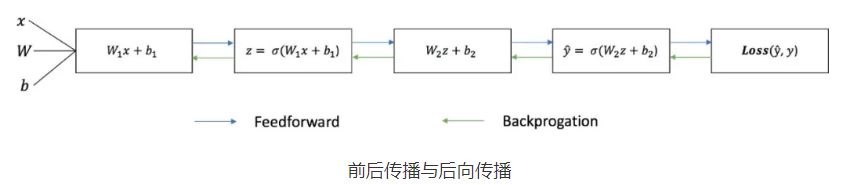

- 定义一个大的前向传播函数
- 预测值y为模型从输入到经过激活函数处理后的输出的结果
- 损失函数我们采用交叉熵损失

In [61]:
# 前向传播的编写思路：
# 激活函数直接表示感知机输出的预测值
# 定义交叉熵损失函数计算了损失
# 损失函数计算了权值 w 和偏置 b的梯度
# 参数梯度结果以字典和损失作为函数输出返回

# 从数组的形状中删除单维度条目，即把shape中为1的维度去掉
# 用法：numpy.squeeze(a,axis = None)

def propagate(w,b,X,Y):
    m=X.shape[1]
    y=sigmoid(np.dot(w.T,X)+b)
    cost=-1/m*np.sum(Y*np.log(y)+(1-Y)*np.log(1-y))
    
    dw=np.dot(X,(y-Y).T)/m
    db=np.sum(y-Y)/m
    assert(dw.shape==w.shape)
    assert(db.dtype==float)
    
    cost=np.squeeze(cost)
    assert(cost.shape==())
    
    grads={'dw':dw,
          'db':db}
    
    return grads, cost

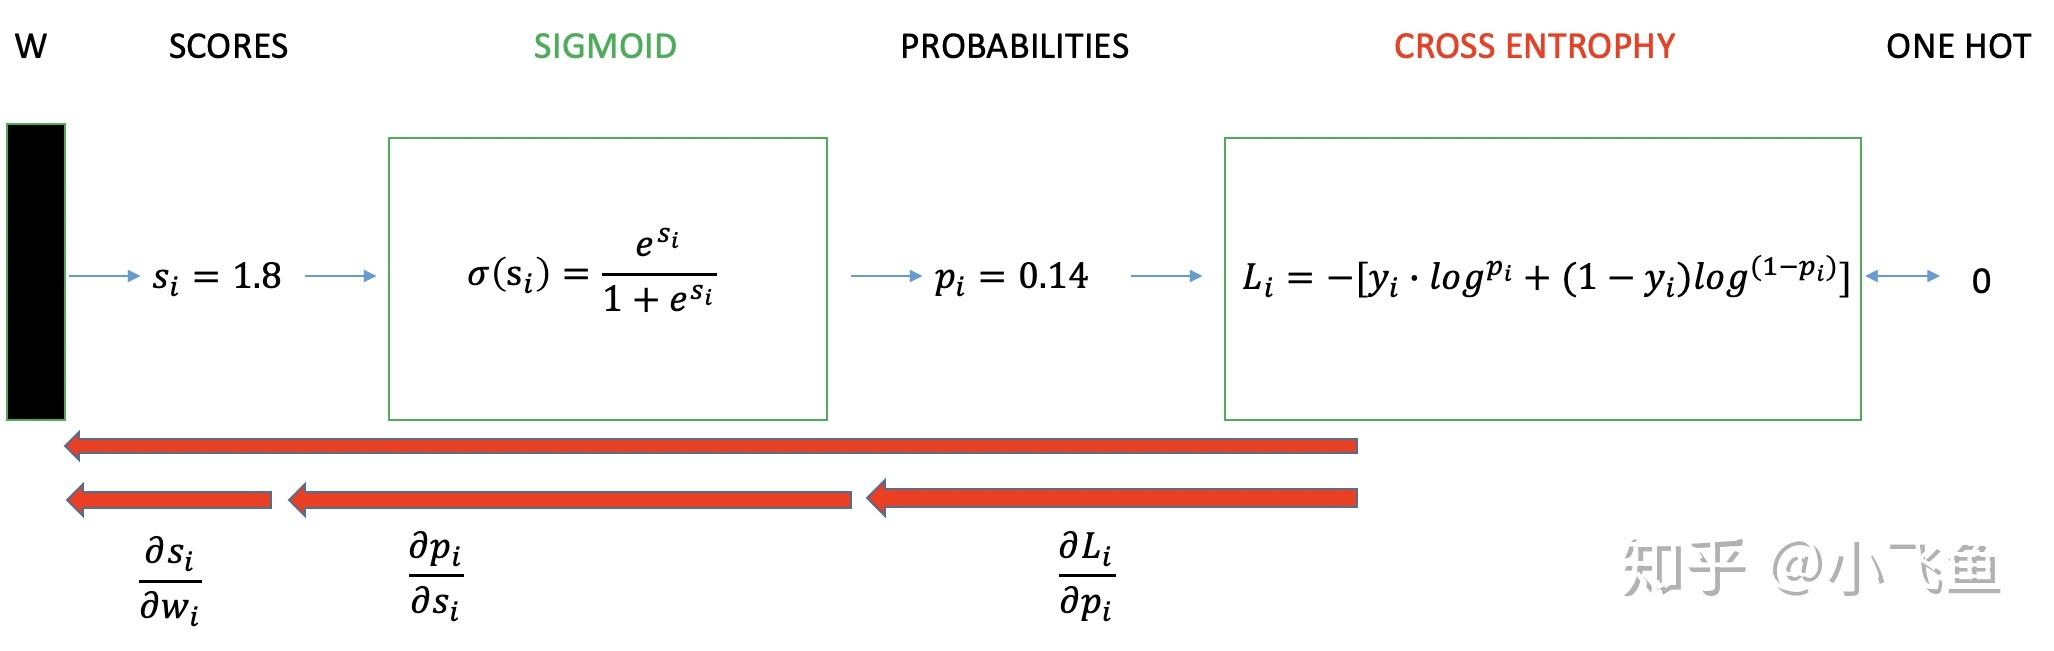

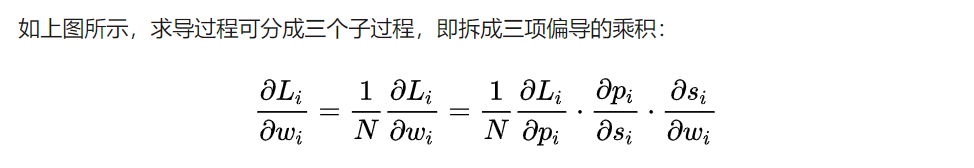

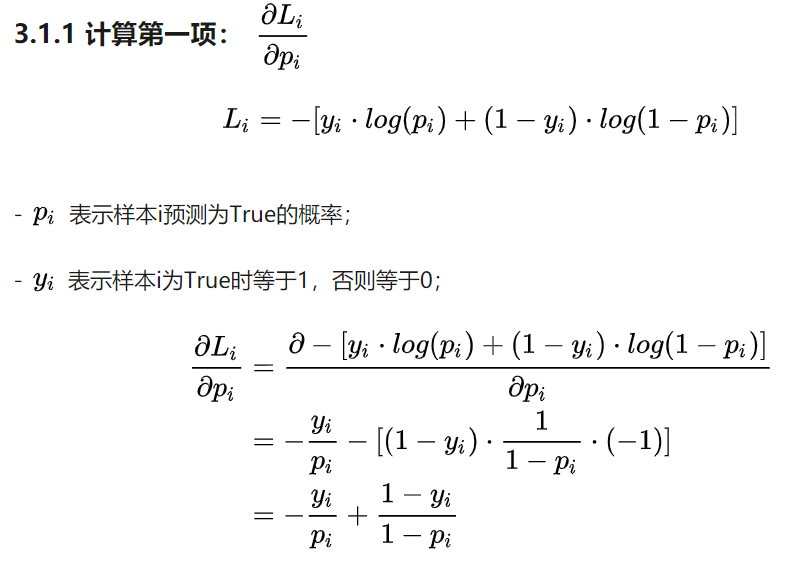

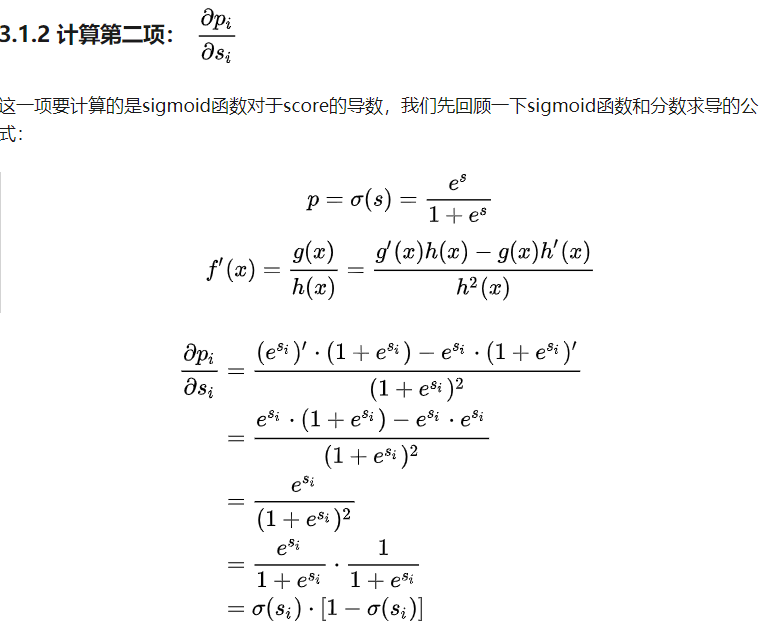

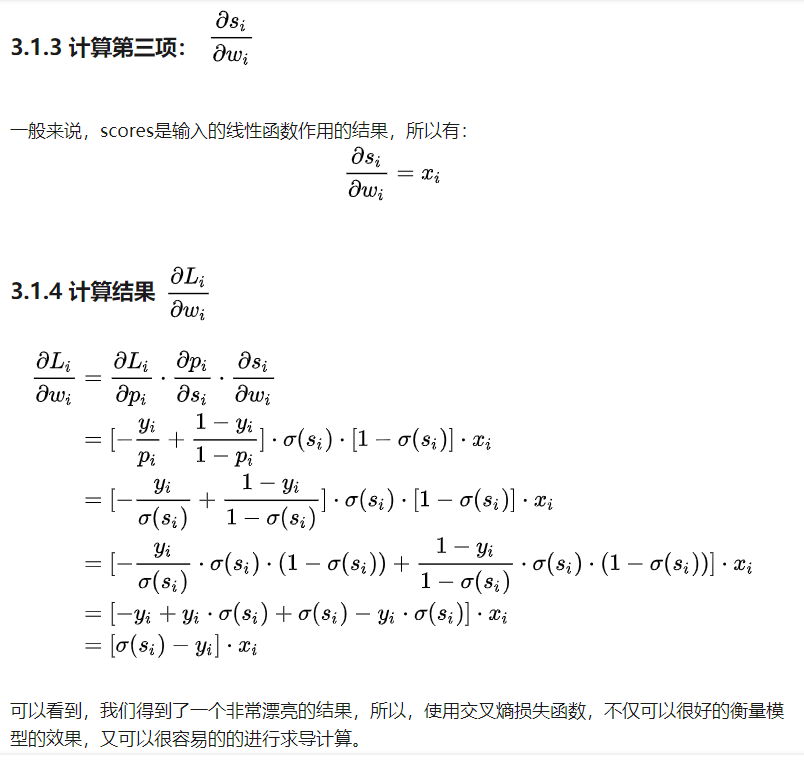

- 模型学习速度：学习率； 偏导值；
- 偏导值的大小取决于样本、模型错误程度；
- 逻辑函数得到概率，交叉熵作损失函数时，模型效果差学习速度较快
- sigmoid(softmax)+cross-entropy loss 擅长于学习类间的信息
- 采用了类间竞争机制，只关心正确标签预测概率的准确性，忽略其他非正确标签的差异，导致学习到的特征比较散。优化：对softmax进行改进，如L-Softmax、SM-Softmax、AM-Softmax等

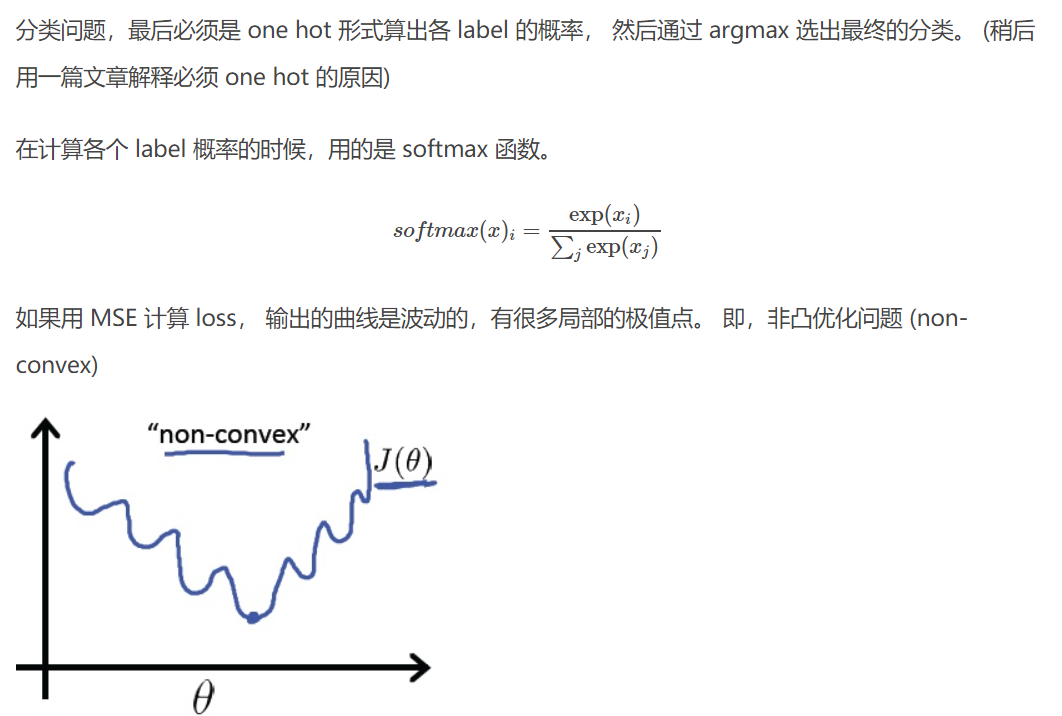

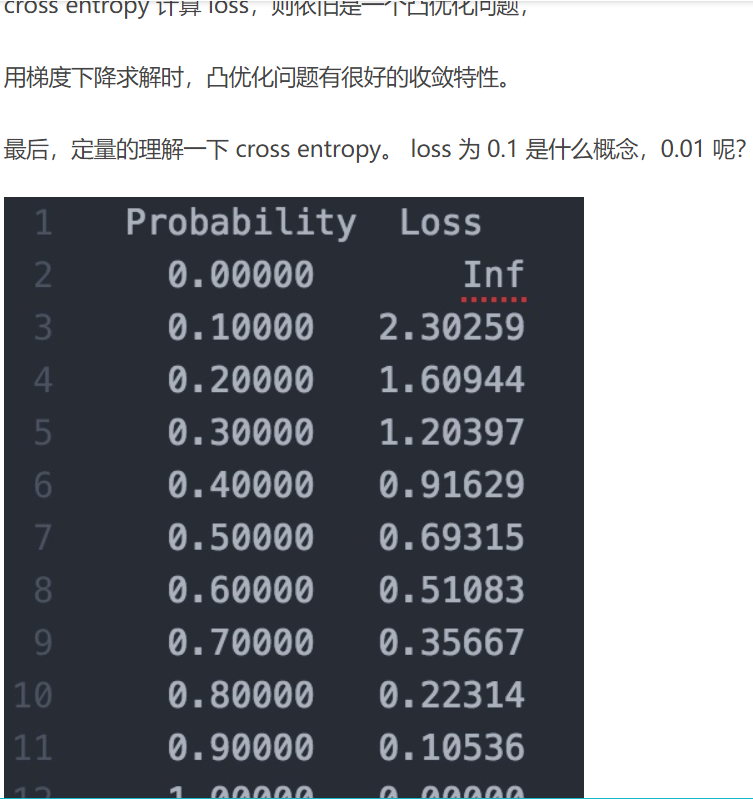

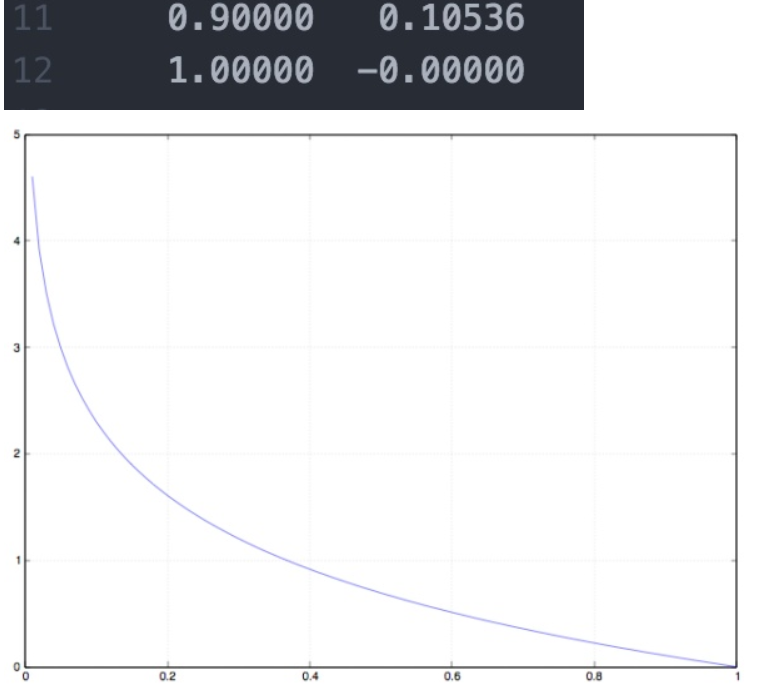

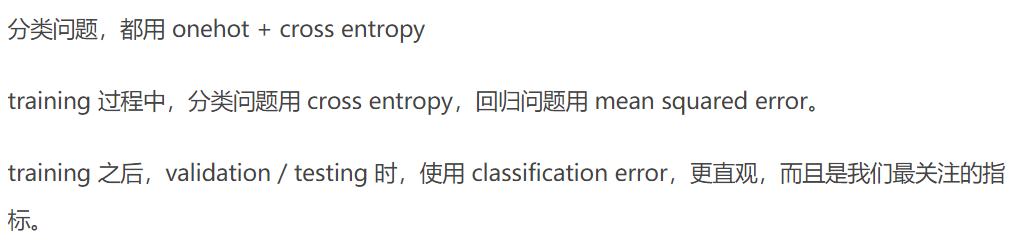

In [49]:
import numpy as np
# x = np.array([[[0,1], [1,2], [2,3]],[[0,1], [1,2], [2,3]]])
x = np.array([[[0,1], [1,2], [2,3]]])
print(x)
 
print(x.shape)
print(x.shape[1])

d = np.squeeze(x)   # 从数组的形状中删除单维条目，即把shape中为1的维度去掉
print(d.shape)

[[[0 1]
  [1 2]
  [2 3]]]
(1, 3, 2)
3
(3, 2)


- backward_propagation
- 计算每一步的当前损失 根据损失对权值进行更新

- 先是建立了一个损失列表容器
- 将前一步定义的前向传播函数放进去执行迭代操作
- 计算每一步的当前损失和梯度
- 利用梯度下降法对权值进行更新
- 用字典封装迭代结束时的参数和梯度进行返回

In [52]:
def backward_propagation(w,b,X,Y,num_iterations,learning_rate,print_cost=False):
    cost=[]
    for i in range(num_iterations):
        grad,cost=propagate(w,b,X,Y)
        
        dw=grad['dw']
        db=grad['db']
        
        w=w-learning_rate*dw
        b=b-learning_rate*db
        if i%100==0:
            cost.append(cost)
        if print_cost and i%100==0:
            print("cost after iteration %i: %f" %(i,cost))
    params={"w":w,"b":b}
    grads={"dw":dw,"db":db}
    return params,grads,costs
    

- 预测函数 predict，将模型的概率输出转化为0/1值

In [55]:
def predict(w,b,X):
    m=X.shape[1]
    Y_prediction=np.zeros((1,m))
    w=w.reshape(X.shape[0],1)
    A=sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        if A[:i]>0.5:
            Y_prediction[:,i]=1
        else:
            Y_prediction[:,i]=0
    assert(Y_prediction.shape==(1,m))
    return Y_prediction

- 函数封装

In [64]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    # initialize
    w,b=initialize_with_zeros(X_train.shape[0]) # Gradient descent
    # Retrieve parameters w and b from dictionary "parameters"
    parameters,grads,costs=backwize(w,b,X_train,Y_train,num_iterations, learning_rate,print_cost)
    w=parameters["w"]
    b=parameters["b"]
    Y_prediction_train=predict(w,b,X_train)
    Y_prediction_test=predict(w,b,X_test)
    print("train accuracy: {}%".format(100-np.mean(np.abs(Y_prediction_train-Y_train))*100))
    print("test accuracy:{}%".format(100-np.mean(np.abs(Y_prediction_test-Y_test))*100))
    
    d={"costs":costs,
      "Y_prediction_test":Y_prediction_test,
      "Y_prediction_train":Y_prediction_train,
      "w":w,
      "b":b,
      "learning_rate":learning_rate,
      "num_iterations":num_iterations}
    return d
    

参考文章：
https://mp.weixin.qq.com/s?__biz=MzI4ODY2NjYzMQ==&mid=2247484153&idx=1&sn=cf3d17f6333855bfd20cbfa3a98bbbf4&chksm=ec3ba791db4c2e878f72af92a76fcc91a832319da14befbc156bda0cf9c28f688df897c1a541&scene=21#wechat_redirect